## Baseline Model: Logistic Regression

This notebook trains and evaluates a baseline multi-class classification
model using Logistic Regression on TF-IDF features derived from Twitter
financial news text.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load cleaned dataset
data_path = "../data/train_clean.csv"
df = pd.read_csv(data_path)

# Remove invalid or low-information records
df = df.dropna(subset=["clean_text"])
df = df[df["clean_text"].str.len() > 10]

# Define features and target
X = df["clean_text"]
y = df["label"]

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples :", X_test.shape[0])


Training samples: 13559
Testing samples : 3390


## TF-IDF Feature Vectorization

TF-IDF is applied to convert text data into numerical features
suitable for Logistic Regression.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF training matrix shape:", X_train_tfidf.shape)
print("TF-IDF testing matrix shape :", X_test_tfidf.shape)


TF-IDF training matrix shape: (13559, 5000)
TF-IDF testing matrix shape : (3390, 5000)


## Logistic Regression Model Training

A Logistic Regression classifier is trained as a baseline model.
Class weights are used to handle class imbalance.


In [3]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class balancing
log_reg_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

# Train the model
log_reg_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model training completed.")


Logistic Regression model training completed.


## Model Evaluation

The trained model is evaluated using precision, recall, and F1-score.
These metrics are more appropriate than accuracy for imbalanced datasets.


In [4]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions
y_pred = log_reg_model.predict(X_test_tfidf)

# Print evaluation metrics
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score:
0.7793510324483776

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67        51
           1       0.83      0.81      0.82       167
           2       0.85      0.69      0.76       709
           3       0.68      0.81      0.74        64
           4       0.99      0.94      0.96        72
           5       0.96      0.93      0.95       197
           6       0.72      0.92      0.81       105
           7       0.80      0.86      0.83       125
           8       0.62      0.73      0.67        33
           9       0.64      0.70      0.67       311
          10       0.70      1.00      0.82        14
          11       0.60      0.67      0.63         9
          12       0.75      0.84      0.79        97
          13       0.64      0.74      0.69        94
          14       0.78      0.72      0.75       365
          15       0.68      0.78      0.73       100
          16       0.8

## Confusion Matrix

The confusion matrix provides a detailed view of prediction performance
across all financial categories.


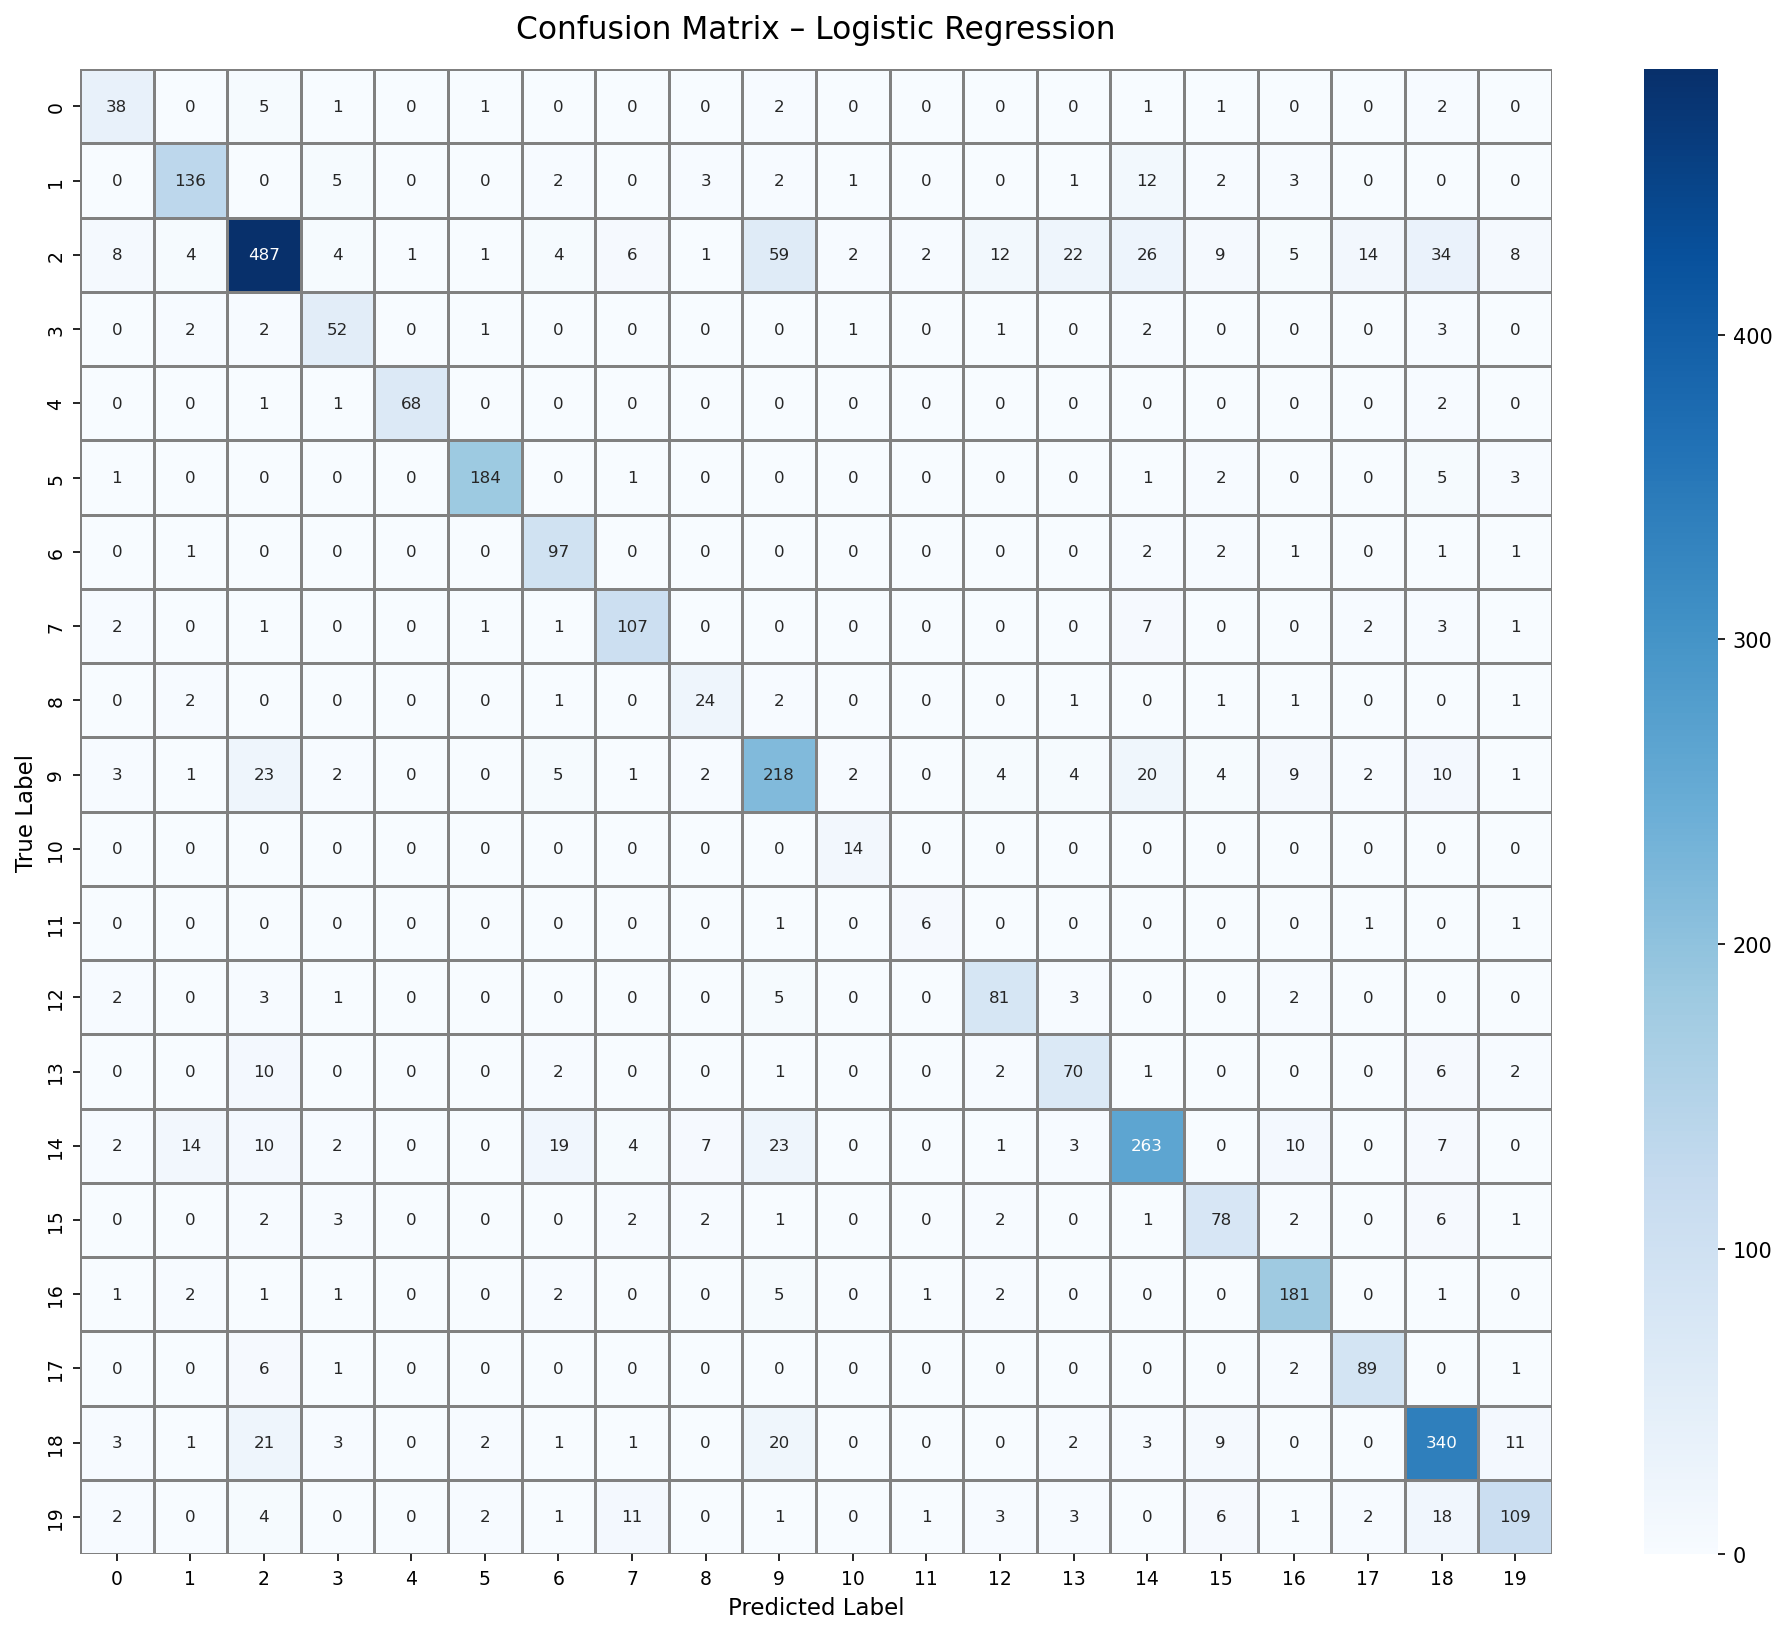

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ------------------------------------------------------------
# Ensure output directory exists
# ------------------------------------------------------------
output_dir = "../outputs/plots"
os.makedirs(output_dir, exist_ok=True)

# ------------------------------------------------------------
# Generate confusion matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

# ------------------------------------------------------------
# Create annotated confusion matrix
# ------------------------------------------------------------
plt.figure(figsize=(13, 11), dpi=150)

sns.heatmap(
    cm,
    cmap="Blues",
    annot=True,              # Show numbers inside cells
    fmt="d",                 # Integer format
    annot_kws={"size": 8},   # Font size for numbers
    linewidths=0.5,          # Grid lines between cells
    linecolor="gray",
    cbar=True
)

plt.title(
    "Confusion Matrix – Logistic Regression",
    fontsize=15,
    pad=15
)
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()

# ------------------------------------------------------------
# Save high-quality image
# ------------------------------------------------------------
save_path = os.path.join(
    output_dir,
    "confusion_matrix_logistic_regression_enhanced.png"
)
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()


## Confusion Matrix Analysis – Logistic Regression

The confusion matrix indicates that the Logistic Regression baseline model
performs well on majority financial news categories, as evidenced by strong
diagonal values representing correct predictions.

Classes with higher sample representation, such as **Company / Product News**,
**Macro**, and **Stock Commentary**, show high classification accuracy and clear
prediction confidence. This suggests that the model effectively learns dominant
patterns when sufficient training data is available.

Misclassifications are more frequent among minority classes, including
**IPO**, **Gold / Metals**, and **Dividend**. These errors are primarily due to
class imbalance and overlapping financial terminology across related categories.

Overall, the confusion matrix validates the baseline model’s reliability while
highlighting opportunities for improvement through advanced models, additional
data balancing strategies, or hyperparameter tuning.


# Baseline Model Summary – Logistic Regression

This section summarizes the development, evaluation, and key observations
from the baseline classification model built for Twitter Financial News
Sentiment Analysis.

---

## 1. Model Objective
The objective of the baseline model was to establish a reliable benchmark
for multi-class financial news classification using traditional machine
learning techniques on TF-IDF features.

---

## 2. Model Selection
Logistic Regression was selected as the baseline classifier due to its
simplicity, interpretability, and strong performance on high-dimensional
sparse text features such as TF-IDF vectors.

To address class imbalance in the dataset, class weighting was applied
during model training.

---

## 3. Feature Representation
Textual data was converted into numerical form using TF-IDF vectorization
with both unigrams and bigrams. This representation captures important
financial terms and short phrases while limiting the impact of common,
less informative words.

The feature space was controlled to ensure computational efficiency and
model stability.

---

## 4. Model Training
The model was trained on a stratified training dataset to preserve the
original label distribution. Logistic Regression was configured with an
increased iteration limit to ensure proper convergence during optimization.

---

## 5. Evaluation Metrics
Model performance was evaluated using multiple metrics, including accuracy,
precision, recall, and F1-score. Given the imbalanced nature of the dataset,
greater emphasis was placed on macro and weighted F1-scores rather than
accuracy alone.

---

## 6. Confusion Matrix Analysis
The confusion matrix revealed strong performance on majority classes such as
**Company / Product News**, **Macro**, and **Stock Commentary**, as indicated by
high diagonal values.

Misclassifications were more frequent among minority classes, including
**IPO**, **Gold / Metals**, and **Dividend**, primarily due to limited training
samples and overlapping financial vocabulary.

---

## 7. Key Insights
- The baseline model effectively captures dominant patterns in financial
  news text.
- Class imbalance significantly impacts performance on low-frequency
  categories.
- Confusion between semantically similar categories is expected in
  real-world financial datasets.

---

## 8. Conclusion
The Logistic Regression baseline model provides a strong and interpretable
benchmark for financial news classification. While performance on majority
classes is robust, further improvements can be achieved through advanced
models, data balancing strategies, or hyperparameter optimization.

This baseline establishes a solid foundation for subsequent model
comparisons and enhancements.
